# Exploratory Data Analysis, POS Tagging, NER

## Importing Dataset

In [10]:
# Import data
file_path = "../Data/hasil_preprocessing2.xlsx"
df = pd.read_excel(file_path)
df

FileNotFoundError: [Errno 2] No such file or directory: '../Data/hasil_preprocessing2.xlsx'

In [2]:
df_processed

,NO,SUMBER,PENERBIT,LINK,JUDUL,content,tags,date,status,clean_text,content_clean,tokens,stopword_removal,stemming_output,rareword_removed,date_final
0,2,economic,Detik,https://finance.detik.com/berita-ekonomi-bisni...,dirjen pajak ungkap kabar terbaru soal perbaik...,direktur jenderal (dirjen) pajak suryo utomo m...,"coretax,dirjen pajak,administrasi perpajakan,f...",Tidak ada tanggal,success,direktur jenderal pajak suryo utomo mengungka...,direktur jenderal pajak suryo utomo mengungkap...,"['direktur', 'jenderal', 'pajak', 'suryo', 'ut...","['direktur', 'jenderal', 'pajak', 'suryo', 'ut...","['direktur', 'jenderal', 'pajak', 'suryo', 'ut...","['direktur', 'jenderal', 'pajak', 'suryo', 'ut...",Tidak ada tanggal
1,3,economic,Detik,https://finance.detik.com/berita-ekonomi-bisni...,djp klaim aplikasi coretax mulai stabil digunakan,direktorat jenderal pajak (djp) kementerian ke...,"coretax,djp,aplikasi perpajakan,pembaruan,ppnb...",25 Maret 2025,success,"rata berada di bawah , detik, dengan performa ...",rata berada di bawah detik dengan performa ter...,"['rata', 'berada', 'di', 'bawah', 'detik', 'de...","['rata', 'berada', 'bawah', 'detik', 'performa...","['rata', 'ada', 'bawah', 'detik', 'performa', ...","['rata', 'ada', 'bawah', 'detik', 'performa', ...",25-03-2025
2,5,local news,DDTC,https://news.ddtc.co.id/berita/nasional/181042...,"latensi turun, djp klaim coretax system sudah ...","ilustrasi. jakarta, ddtcnews - ditjen pajak (d...","administrasi pajak, coretax, coretax system, djp",30 April 2025,success,ditjen pajak menilai performa coretax adminis...,ditjen pajak menilai performa coretax administ...,"['ditjen', 'pajak', 'menilai', 'performa', 'co...","['ditjen', 'pajak', 'menilai', 'performa', 'co...","['ditjen', 'pajak', 'nilai', 'performa', 'core...","['ditjen', 'pajak', 'nilai', 'performa', 'core...",30-04-2025
3,6,economic,Detik,https://finance.detik.com/berita-ekonomi-bisni...,awas penipuan catut nama coretax! begini modus...,ditjen pajak (djp) kementerian keuangan (kemen...,"penipuan,coretax,ditjen pajak,catut nama coret...",Tidak ada tanggal,success,akhir ini marak penipuan yang mengatasnamakan ...,akhir ini marak penipuan yang mengatasnamakan ...,"['akhir', 'ini', 'marak', 'penipuan', 'yang', ...","['akhir', 'marak', 'penipuan', 'mengatasnamaka...","['akhir', 'marak', 'tipu', 'mengatasnamakan', ...","['akhir', 'marak', 'tipu', 'mengatasnamakan', ...",Tidak ada tanggal
4,7,local news,Tempo,https://www.tempo.co/ekonomi/hari-ini-direktor...,hari ini direktorat jenderal pajak rapat tertu...,scroll ke bawah untuk membaca berita baca be...,tidak ada tags,1 Januari 2025,success,direktur jenderal atau dirjen pajak kementeria...,direktur jenderal atau dirjen pajak kementeria...,"['direktur', 'jenderal', 'atau', 'dirjen', 'pa...","['direktur', 'jenderal', 'dirjen', 'pajak', 'k...","['direktur', 'jenderal', 'dirjen', 'pajak', 'm...","['direktur', 'jenderal', 'dirjen', 'pajak', 'm...",01-01-2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,155,local news,CNBC,https://www.cnbcindonesia.com/news/20250114071...,keluhan soal coretax terus muncul: sistem tak ...,"jakarta, cnbc indonesia - kalangan pengusaha d...","coretax, pajak, djp",1 Januari 2025,success,kalangan pengusaha dan pakar pajak memberikan ...,kalangan pengusaha dan pakar pajak memberikan ...,"['kalangan', 'pengusaha', 'dan', 'pakar', 'paj...","['kalangan', 'pengusaha', 'pakar', 'pajak', 'm...","['kalang', 'usaha', 'pakar', 'pajak', 'beri', ...","['kalang', 'usaha', 'pakar', 'pajak', 'beri', ...",01-01-2025
150,156,local news,Viva,https://www.viva.co.id/bisnis/1809316-coretax-...,"coretax bermasalah di awal tahun, misbakhun te...","jakarta, viva – meskipun terjadi defisit pada ...","misbakhun, coretax, apbn, golkar, pajak",22 Maret 2025,success,"bulan berikutnya. makanya, misbakhun meminta p...",bulan berikutnya makanya misbakhun meminta par...,"['bulan', 'berikutnya', 'makanya', 'misbakhun'...","['bulan', 'berikutnya', 'makanya', 'misbakhun'

# Exploratory Data Analysis

## DataFrame Information

In [11]:
# prompt: buatkan kode untuk exploratory data analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Basic Information
print("=== Basic Info ===")
print(df_processed.info())
print("\n=== Descriptive Statistics ===")
print(df_processed.describe())

# Missing Values
print("\n=== Missing Values ===")
print(df_processed.isnull().sum())


=== Basic Info ===


NameError: name 'df_processed' is not defined

## Jumlah Review Setiap Bulan

<ipython-input-4-bbaaf61a4d9d>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_final'] = pd.to_datetime(df['date_final'], errors='coerce')


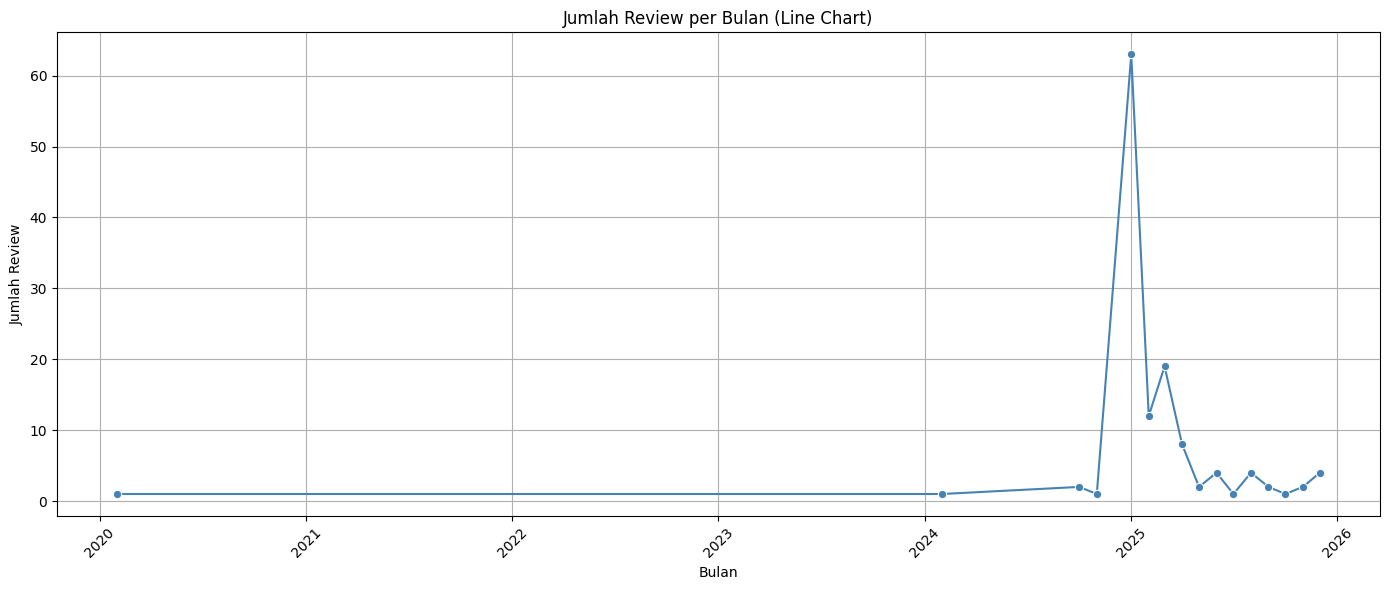

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Salin dataframe
df = df_processed.copy()

# Hapus baris dengan tanggal tidak valid
df = df.dropna(subset=['date_final'])

# Ubah kolom menjadi format datetime
df['date_final'] = pd.to_datetime(df['date_final'], errors='coerce')

# Ekstrak bulan dan tahun
df['month'] = df['date_final'].dt.month
df['year'] = df['date_final'].dt.year

# Kelompokkan dan hitung jumlah review per bulan
monthly_reviews = df.groupby(['year', 'month']).size().reset_index(name='review_count')

# Gabungkan jadi satu kolom datetime untuk visualisasi (format: YYYY-MM)
monthly_reviews['month_year'] = pd.to_datetime(monthly_reviews[['year', 'month']].assign(day=1))

# Urutkan berdasarkan waktu
monthly_reviews = monthly_reviews.sort_values('month_year')

# Buat line chart
plt.figure(figsize=(14, 6))
sns.lineplot(x='month_year', y='review_count', data=monthly_reviews, marker='o', color='steelblue')

plt.title('Jumlah Review per Bulan (Line Chart)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Review')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## Frekuensi Sumber


=== Frequency of Sumber ===
SUMBER
local news    79
economic      51
opinion       18
academic       6
Name: count, dtype: int64


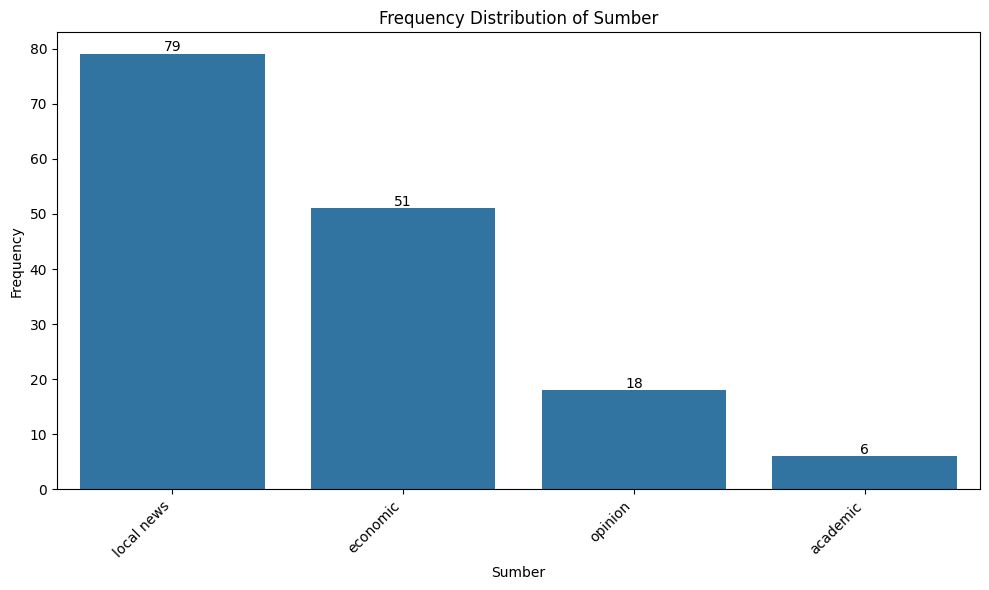

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cek frekuensi kolom 'SUMBER'
print("\n=== Frequency of Sumber ===")
print(df_processed['SUMBER'].value_counts())

# Visualisasi distribusi frekuensi
plt.figure(figsize=(10, 6))

# Urutan kategori berdasarkan frekuensi (menurun)
order = df_processed['SUMBER'].value_counts().index

# Buat countplot dan simpan sebagai objek ax
ax = sns.countplot(x='SUMBER', data=df_processed, order=order)

# Tambahkan label di atas setiap bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,  # posisi x di tengah bar
        height + 0.5,                   # sedikit di atas bar
        int(height),                    # nilai yang ditampilkan
        ha='center'
    )

plt.title('Frequency Distribution of Sumber')
plt.xlabel('Sumber')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Biar tidak terpotong
plt.show()


## Distribusi Penerbit


=== Frequency of Penerbit ===
PENERBIT
DDTC                         18
Tempo                        17
CNBC                         12
Kontan                       10
Hukum Online                 10
Kompas                        8
Bisnis                        7
ORTAX                         7
Detik                         6
Antara News                   4
MetroTV                       4
NTVNews                       3
CNN                           3
Kompasiana                    3
Pajak                         3
UGM                           2
Untirta                       2
RMOL                          2
djp                           2
pajakku                       2
Buleleng Kab                  2
Investor                      2
Pajak Online                  1
Balikpapan Pos                1
Inter Counbix                 1
Konsultan Manajemen Pajak     1
Goriau                        1
Emitennews                    1
Fajar                         1
Bloomberg Technoz             1


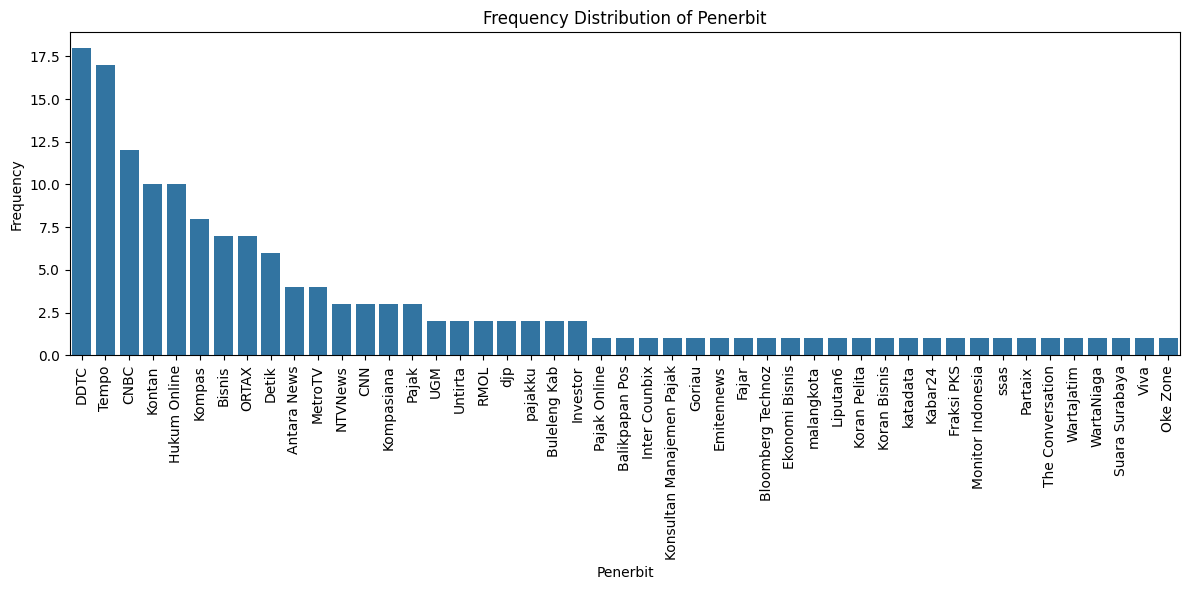

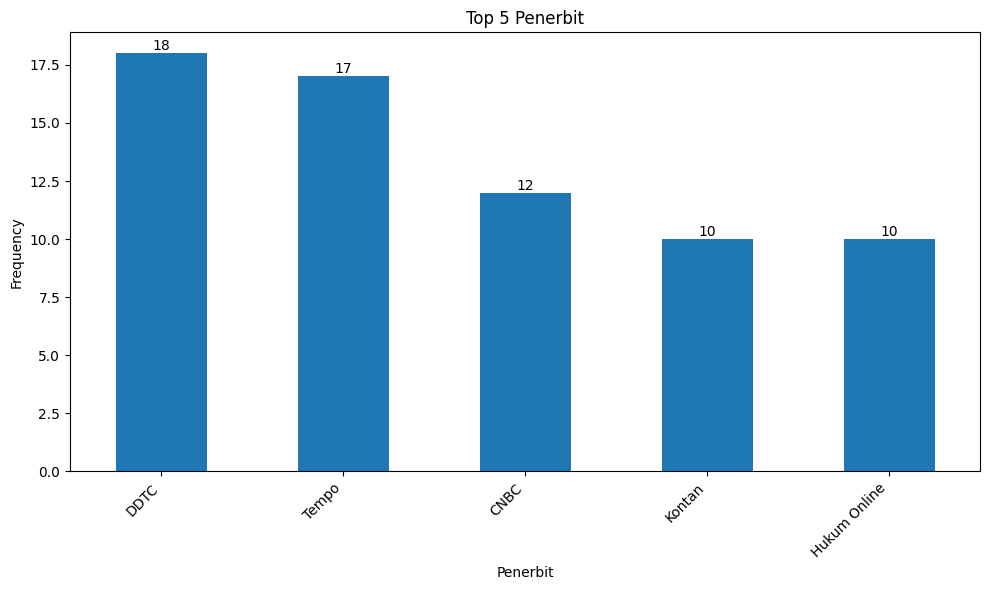

In [6]:
import matplotlib.pyplot as plt
# --- PENERBIT Frequency Analysis and Visualization ---
# Frequency counts
print("\n=== Frequency of Penerbit ===")
penerbit_counts = df_processed['PENERBIT'].value_counts()
print(penerbit_counts)

# Top 5 Penerbit
print("\n=== Top 5 Penerbit ===")
top_5_penerbit = penerbit_counts.head(5)
print(top_5_penerbit)

# Plot full distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='PENERBIT', data=df_processed, order=penerbit_counts.index)
plt.title('Frequency Distribution of Penerbit')
plt.xlabel('Penerbit')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot Top 5 with labels
plt.figure(figsize=(10, 6))
ax = top_5_penerbit.plot(kind='bar')
plt.title('Top 5 Penerbit')
plt.xlabel('Penerbit')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

# Add value labels on each bar
def add_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom')

add_labels(ax)
plt.tight_layout()
plt.show()


## Wordcloud

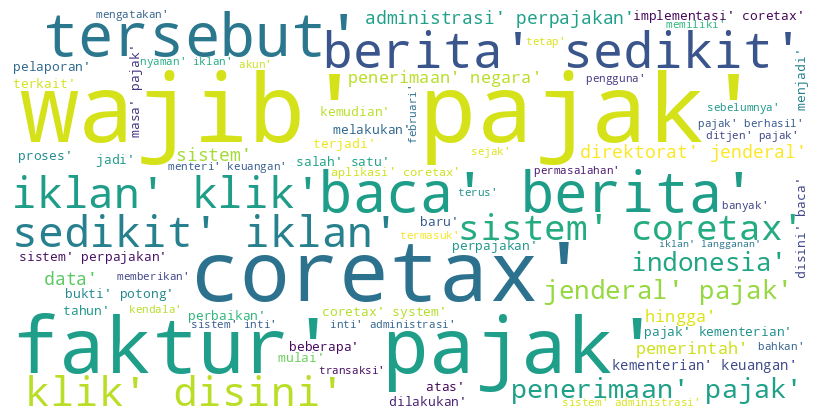

In [7]:
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Assuming 'clean_text' column contains the cleaned text data
text = " ".join(review for review in df_processed['stopword_removal'])

# Create and generate a word cloud image:
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=STOPWORDS,
                      min_font_size=10).generate(text)

# Display the generated image:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


# POS Tagging


POS Tagging (Part-of-Speech Tagging) adalah proses pemberian label pada setiap kata dalam suatu teks dengan kategori gramatikalnya, seperti kata benda, kata kerja, kata sifat, dan sebagainya.

## Installing & Importing Dependencies

In [ ]:
# Install Dependencies
!pip install polyglot
!pip install pyicu
!pip install pycld2
!pip install morfessor
!pip install wordcloud
!pip install seaborn

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

# Install Polyglot Embeddings untuk Bahasa Indonesia
!polyglot download pos2.id
!polyglot download embeddings2.id


  Preparing metadata (setup.py) ... done
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=52562 sha256=c9d7478fde242bcf0d173a6df63223dea9aff2dccd350746583cb0c4a1365ff0
  Stored in directory: /Users/macbook/Library/Caches/pip/wheels/c7/5e/28/47349211ec1f91379f41ed10bc2520f7071ecfb6cbe182f6fe
Successfully built polyglot
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyicu: filename=pyicu-2.15.2-cp312-cp312-macosx_11_0_arm64.whl size=388866 sha256=1cb94b38b0a2d7d3094f9423cb254250b8c17fe2840f782cb9dd07ebeb7c196c
  Stored in directory: /Users/macbook/Library/Caches/pip/wheels/a1/62/23/a21ec71904c8c6a0c9f2b082c24268a40e393d350d5fbadd75
Successfully built pyicu
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 1.4 MB/s eta 0:00:00a 0:00:010m


[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading punkt_tab: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify
[nltk_data]     failed: unable to get local issuer certificate
[nltk_data]     (_ssl.c:1000)>
[nltk_data] Error loading averaged_perceptron_tagger_eng: <urlopen
[nltk_data]     error [SSL: CERTIFICATE_VERIFY_FAILED] certificate
[nltk_data]     verify failed: unable to get local issuer certificate
[nltk_data]     (_ssl.c:1000)>


[polyglot_data] Error loading pos2.id: HTTP Error 404: Not Found
Error installing package. Retry? [n/y/e]


## Compute POS Tag Counts

In [ ]:
# Full pipeline: compute POS tag counts and show in user‑friendly table
import re
import pandas as pd
from textblob import TextBlob
from collections import Counter
from IPython.display import display

# 1. Define mapping of POS codes to human‑friendly names
pos_label_map = {
    'NN': 'Noun, singular or mass',
    'NNS': 'Noun, plural',
    'NNP': 'Proper noun, singular',
    'NNPS': 'Proper noun, plural',
    'VB': 'Verb, base form',
    'VBD': 'Verb, past tense',
    'VBG': 'Verb, gerund/present participle',
    'VBN': 'Verb, past participle',
    'VBP': 'Verb, non‑3rd person singular present',
    'VBZ': 'Verb, 3rd person singular present',
    'JJ': 'Adjective',
    'JJR': 'Adjective, comparative',
    'JJS': 'Adjective, superlative',
    'RB': 'Adverb',
    'RBR': 'Adverb, comparative',
    'RBS': 'Adverb, superlative',
    'PRP': 'Personal pronoun',
    'PRP$': 'Possessive pronoun',
    'IN': 'Preposition/subordinating conjunction',
    'DT': 'Determiner',
    'CC': 'Coordinating conjunction',
    'UH': 'Interjection',
    # add more as needed
}

# 2. Collect all POS tags from each cleaned review
all_pos = []
word_pos_map = {}
for content in df_processed['stopword_removal'].fillna(''):
    if content.strip():
        for word, pos in TextBlob(content).tags:
            all_pos.append(pos)
            word_pos_map.setdefault(pos, []).append(word.lower())

# 3. Compute overall counts and unique token counts per tag
pos_counts = Counter(all_pos)
unique_counts = {pos: len(set(words)) for pos, words in word_pos_map.items()}

# 4. Build DataFrame
rows = []
for pos, count in pos_counts.items():
    rows.append({
        'Tag': pos,
        'Tag Name': pos_label_map.get(pos, 'Other'),
        'Count': count,
        'Unique Tokens': unique_counts.get(pos, 0)
    })
pos_df = pd.DataFrame(rows)

# 5. Sort by Count descending and display as table
pos_df = pos_df.sort_values('Count', ascending=False).reset_index(drop=True)
display(pos_df)


In [ ]:
# Download the CSV
pos_df.to_csv('pos_tag_counts_coretax_article_news.csv', index=False)

## Counting Common Tagged Words

In [ ]:
# Full pipeline: clean, POS-tag, and count frequencies using TextBlob
import re
import pandas as pd
from textblob import TextBlob
from collections import Counter
from IPython.display import display

# 1. Define a cleaning function to remove control and non-printable characters
def clean_text(s: str) -> str:
    if not isinstance(s, str):
        return ''
    # Remove all non-printable ASCII characters (outside hex 20–7E)
    s = re.sub(r"[^\x20-\x7E]", " ", s)
    # Collapse any sequence of whitespace into a single space
    s = re.sub(r"\s+", " ", s)
    return s.strip()

# 2. Apply cleaning to the stopword-removed column
df_processed['cleaned'] = df_processed['stopword_removal'].apply(clean_text)

# 3. Combine all cleaned text into one string
all_text = " ".join(text for text in df_processed['cleaned'].dropna() if text)

# 4. Tag parts of speech with TextBlob
blob = TextBlob(all_text)
pos_tags = blob.tags  # list of (word, POS)

# 5. Count frequencies of each cleaned, lowercased word (skip empties)
word_freq = Counter(
    w for w in (word.strip("'").lower() for word, _ in pos_tags) if w
)

# 6. Build DataFrame of unique words, POS tags, and frequencies
records = []
seen = set()
for word, pos in pos_tags:
    cleaned = word.strip("'").lower()
    if not cleaned or cleaned in seen:
        continue
    seen.add(cleaned)
    records.append((cleaned, pos, word_freq[cleaned]))

word_info_df = (
    pd.DataFrame(records, columns=["Word", "POS Tag", "Frequency"])
    .sort_values(by="Frequency", ascending=False)
)

# 7. Display the top entries as a table
# Using Jupyter's rich display for DataFrame
display(word_info_df.head(10))


#Named Entity Recognition (NER)


## Compute NER

In [ ]:
# 1. Install transformers
!pip install transformers

# 2. Import
import pandas as pd
import ast
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline

# 3. Load NER model khusus Bahasa Indonesia
model_name = "cahya/bert-base-indonesian-NER"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)

ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer, grouped_entities=True)

# 4. Fungsi ekstraksi entitas
def extract_named_entities(text):
    try:
        results = ner_pipeline(text)
        return [(ent['word'], ent['entity_group']) for ent in results]
    except:
        return []

# 5. Konversi string list jadi list Python asli dan gabung jadi string
def preprocess_stopword_column(text):
    try:
        tokens = ast.literal_eval(text)
        return " ".join(tokens)
    except:
        return ""

# 6. Terapkan ke DataFrame
df_processed['stopword_str'] = df_processed['stopword_removal'].apply(preprocess_stopword_column)
df_processed['named_entities'] = df_processed['stopword_str'].apply(extract_named_entities)

# 7. Lihat hasil
print(df_processed[['stopword_removal', 'named_entities']].head())


## Visualize NER Output

In [ ]:
from IPython.display import display, HTML

# Fungsi mewarnai entitas di dalam teks
def highlight_entities(text, entities):
    highlighted_text = text
    offset = 0  # offset agar insert tag tidak merusak posisi entity
    colors = {
        "PER": "#e6ffe6",
        "ORG": "#e6f7ff",
        "LOC": "#fff0e6",
        "MISC": "#f9e6ff",
        "DAT": "#fef9e7",
        "CRD": "#eaeaea",
        "EVT": "#fce5cd",
        "PRD": "#d9d2e9",
        "NOR": "#f4cccc"
    }

    # Urutkan entitas berdasarkan posisi muncul agar tidak salah highlight
    for word, label in entities:
        if word.strip() == "":
            continue
        # Cari posisi kata (bisa jadi multiple jika kata muncul berkali)
        start = highlighted_text.lower().find(word.lower(), offset)
        if start == -1:
            continue
        end = start + len(word)
        color = colors.get(label, "#DDDDDD")
        span = f"<span style='background-color:{color}; padding:2px; border-radius:4px;'>{word} <small>[{label}]</small></span>"
        highlighted_text = highlighted_text[:start] + span + highlighted_text[end:]
        offset = start + len(span)

    return highlighted_text

# Contoh visualisasi pada baris pertama
index = 0
raw_text = df_processed['stopword_str'].iloc[index]
entities = df_processed['named_entities'].iloc[index]

html = highlight_entities(raw_text, entities)
display(HTML(f"<div style='font-family:monospace; line-height:1.8;'>{html}</div>"))


## Counting Entity Frequency

In [ ]:
import pandas as pd
from collections import Counter
# Flatten the list of named entities
all_entities = [entity for sublist in df_processed['named_entities'] for entity in sublist]

# Count entity frequencies
entity_counts = Counter(entity[1] for entity in all_entities)

# Create a DataFrame for better visualization
entity_freq_df = pd.DataFrame.from_dict(entity_counts, orient='index', columns=['Frequency'])
entity_freq_df = entity_freq_df.sort_values('Frequency', ascending=False)

# Display the DataFrame
display(entity_freq_df)

# Simpan DataFrame sebagai CSV
output_path = "../data/hasil_preprocessing.csv"
df.to_csv(output_path, index=False)